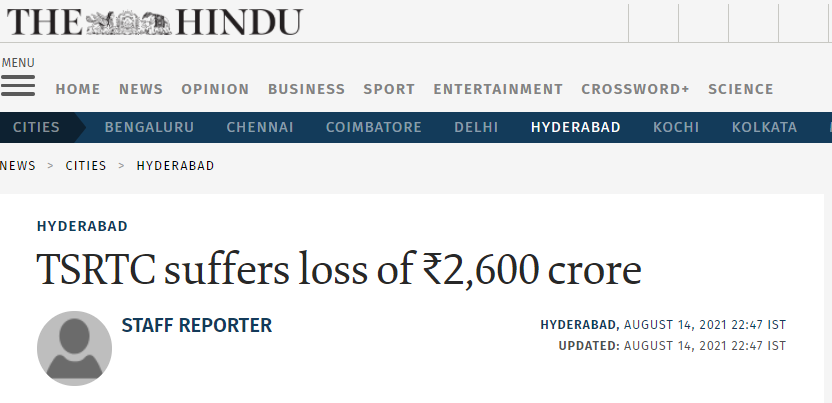

<a href=https://www.thehindu.com/news/cities/Hyderabad/tsrtc-suffers-loss-of-rs-2600-crore/article35918317.ece>

In [5]:
# Reference link-- https://www.thehindu.com/news/cities/Hyderabad/tsrtc-suffers-loss-of-rs-2600-crore/article35918317.ece

# This is a case study of TSRTC getting heavy losses.

### Approach:
* There are different types of passengers travelling in a bus. Having the data of different types of users, the daily distance they travel, Fare they pay etc.. and analysing this data to identify patterns and develop efficient methods to avoid losses can save our state owned RTC. Using various methods of visualization and Machine Learning this problem can be efficiently solved (if data is available).

# Private travels are under high profits whereas TSRTC can't run in profits?

> Being a state owned Transport, Having a high network, number of buses and employees we aren't achieving things. 
If we are through the data and understand the perfect needs of passengers we can achieve our goal and we are never under a loss.

> Being a resident of Telangana, possessing  a lot of knowledge in Data Science, I want to contribute to the development of our state owned Transport and we should become the role model to other states. I promise to bring out new methods to make RTC a better one.

# Solving this problem using Sample Data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('RTC.csv')

In [9]:
df=df.head(21)

In [10]:
df.head()

,Bus_id,B_Type,Driver_id,Tc_id,Bus_Depot,Bus_timing,Fare,Tickets_sold,Distance_travelled,ed_inst,companies,no_ptravels,Bus_condition,Total_trips,Earned,Expenses,Result
0,TS001,ord,DR001,TC001,GANDI,8.0,25.0,50.0,60.0,3.0,3.0,1.0,0.0,3.0,3750.0,3000.0,750.0
1,TS002,exp,DR002,TC002,SURARAM,9.0,20.0,60.0,70.0,5.0,5.0,0.0,0.0,3.0,3600.0,3000.0,600.0
2,TS003,exp,DR003,TC003,BALNAGAR,7.0,30.0,25.0,80.0,1.0,0.0,6.0,1.0,4.0,3000.0,4000.0,-1000.0
3,TS004,exp,DR004,TC004,SEC,4.0,25.0,36.0,60.0,1.0,2.0,4.0,0.0,5.0,10800.0,5000.0,5800.0
4,TS005,ord,DR005,TC005,CBS,15.0,20.0,55.0,50.0,1.0,1.0,1.0,1.0,2.0,2200.0,3000.0,-800.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Bus_id              20 non-null     object 
 1   B_Type              20 non-null     object 
 2   Driver_id           20 non-null     object 
 3   Tc_id               20 non-null     object 
 4   Bus_Depot           20 non-null     object 
 5   Bus_timing          20 non-null     float64
 6   Fare                20 non-null     float64
 7   Tickets_sold        20 non-null     float64
 8   Distance_travelled  20 non-null     float64
 9   ed_inst             20 non-null     float64
 10  companies           20 non-null     float64
 11  no_ptravels         20 non-null     float64
 12  Bus_condition       20 non-null     float64
 13  Total_trips         20 non-null     float64
 14  Earned              20 non-null     float64
 15  Expenses            20 non-null     float64
 16  Result    

In [12]:
# removing null values

In [13]:
df.isnull().sum()

Bus_id                1
B_Type                1
Driver_id             1
Tc_id                 1
Bus_Depot             1
Bus_timing            1
Fare                  1
Tickets_sold          1
Distance_travelled    1
ed_inst               1
companies             1
no_ptravels           1
Bus_condition         1
Total_trips           1
Earned                1
Expenses              1
Result                1
dtype: int64

<AxesSubplot:>

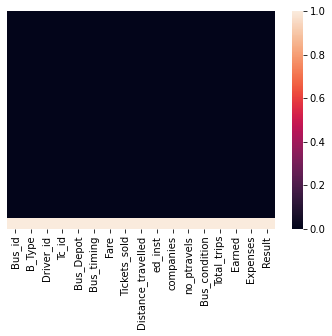

In [14]:
sns.heatmap(df.isnull(),yticklabels=False)

In [15]:
# dropping null values

In [16]:
df=df.dropna()

In [17]:
df

,Bus_id,B_Type,Driver_id,Tc_id,Bus_Depot,Bus_timing,Fare,Tickets_sold,Distance_travelled,ed_inst,companies,no_ptravels,Bus_condition,Total_trips,Earned,Expenses,Result
0,TS001,ord,DR001,TC001,GANDI,8.0,25.0,50.0,60.0,3.0,3.0,1.0,0.0,3.0,3750.0,3000.0,750.0
1,TS002,exp,DR002,TC002,SURARAM,9.0,20.0,60.0,70.0,5.0,5.0,0.0,0.0,3.0,3600.0,3000.0,600.0
2,TS003,exp,DR003,TC003,BALNAGAR,7.0,30.0,25.0,80.0,1.0,0.0,6.0,1.0,4.0,3000.0,4000.0,-1000.0
3,TS004,exp,DR004,TC004,SEC,4.0,25.0,36.0,60.0,1.0,2.0,4.0,0.0,5.0,10800.0,5000.0,5800.0
4,TS005,ord,DR005,TC005,CBS,15.0,20.0,55.0,50.0,1.0,1.0,1.0,1.0,2.0,2200.0,3000.0,-800.0
5,TS006,ord,DR006,TC006,JDM,9.0,25.0,60.0,40.0,8.0,8.0,0.0,0.0,3.0,4500.0,5000.0,-500.0
6,TS007,ord,DR007,TC007,MEDCHAL,14.0,30.0,20.0,50.0,2.0,1.0,3.0,0.0,1.0,600.0,1000.0,-400.0
7,TS008,ord,DR008,TC008,GANDI,13.0,30.0,15.0,80.0,1.0,0.0,5.0,2.0,1.0,450.0,1000.0,-550.0
8,TS009,ord,DR009,TC009,SEC,12.0,25.0,20.0,70.0,0.0,0.0,4.0,0.0,2.0,1000.0,2000.0,-1000.0
9,TS010,exp,DR010,TC010,CBS,11.0,30.0,20.0,40.0,0.0,0.0,4.0,1.0,2.0,1200.0,2000.0,-800.0


In [18]:
df.isnull().sum()

Bus_id                0
B_Type                0
Driver_id             0
Tc_id                 0
Bus_Depot             0
Bus_timing            0
Fare                  0
Tickets_sold          0
Distance_travelled    0
ed_inst               0
companies             0
no_ptravels           0
Bus_condition         0
Total_trips           0
Earned                0
Expenses              0
Result                0
dtype: int64

# Univariate analysis

In [19]:
df['B_Type'].value_counts()

ord    11
exp     9
Name: B_Type, dtype: int64

<AxesSubplot:xlabel='B_Type', ylabel='count'>

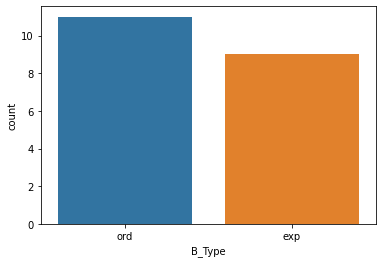

In [20]:
sns.countplot(df['B_Type'])

In [21]:
# ordinary are more than exp so there are chances that more people prefer ordinary

<AxesSubplot:xlabel='Fare', ylabel='count'>

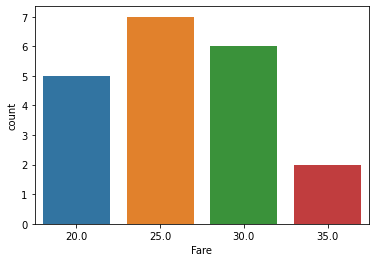

In [22]:
sns.countplot(df['Fare'])

<AxesSubplot:xlabel='Tickets_sold', ylabel='count'>

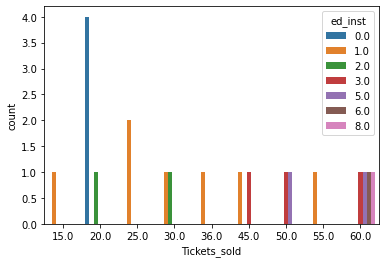

In [23]:
sns.countplot(df['Tickets_sold'],hue=df['ed_inst'])

In [24]:
"""when education institutions are high the no.of tickets sold is less. so there should be separate buses 
 arranged for students with full occupancy"""


'when education institutions are high the no.of tickets sold is less. so there should be separate buses \n arranged for students with full occupancy'

<AxesSubplot:xlabel='B_Type', ylabel='count'>

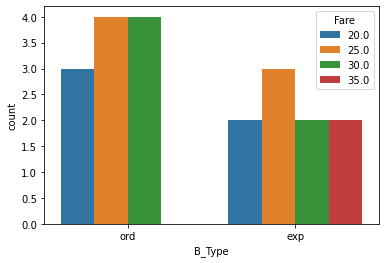

In [25]:
sns.countplot(df['B_Type'],hue=df['Fare'])

### in ordinary the ticket fare with 30 and 25 are mostly sold where as in express only the ticket with fare 25 is highly sold

* so fare price is dependent on the no.of tickets sold


<AxesSubplot:xlabel='Bus_condition', ylabel='count'>

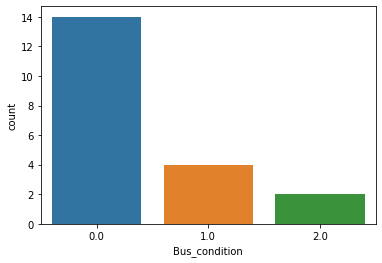

In [26]:
sns.countplot(df['Bus_condition'])

* '0' represents there is no repair

* '1' represents there is little repair

* '2' represents there is heavy repair

* there is a direct realtion between the condition of the bus and expenses occured

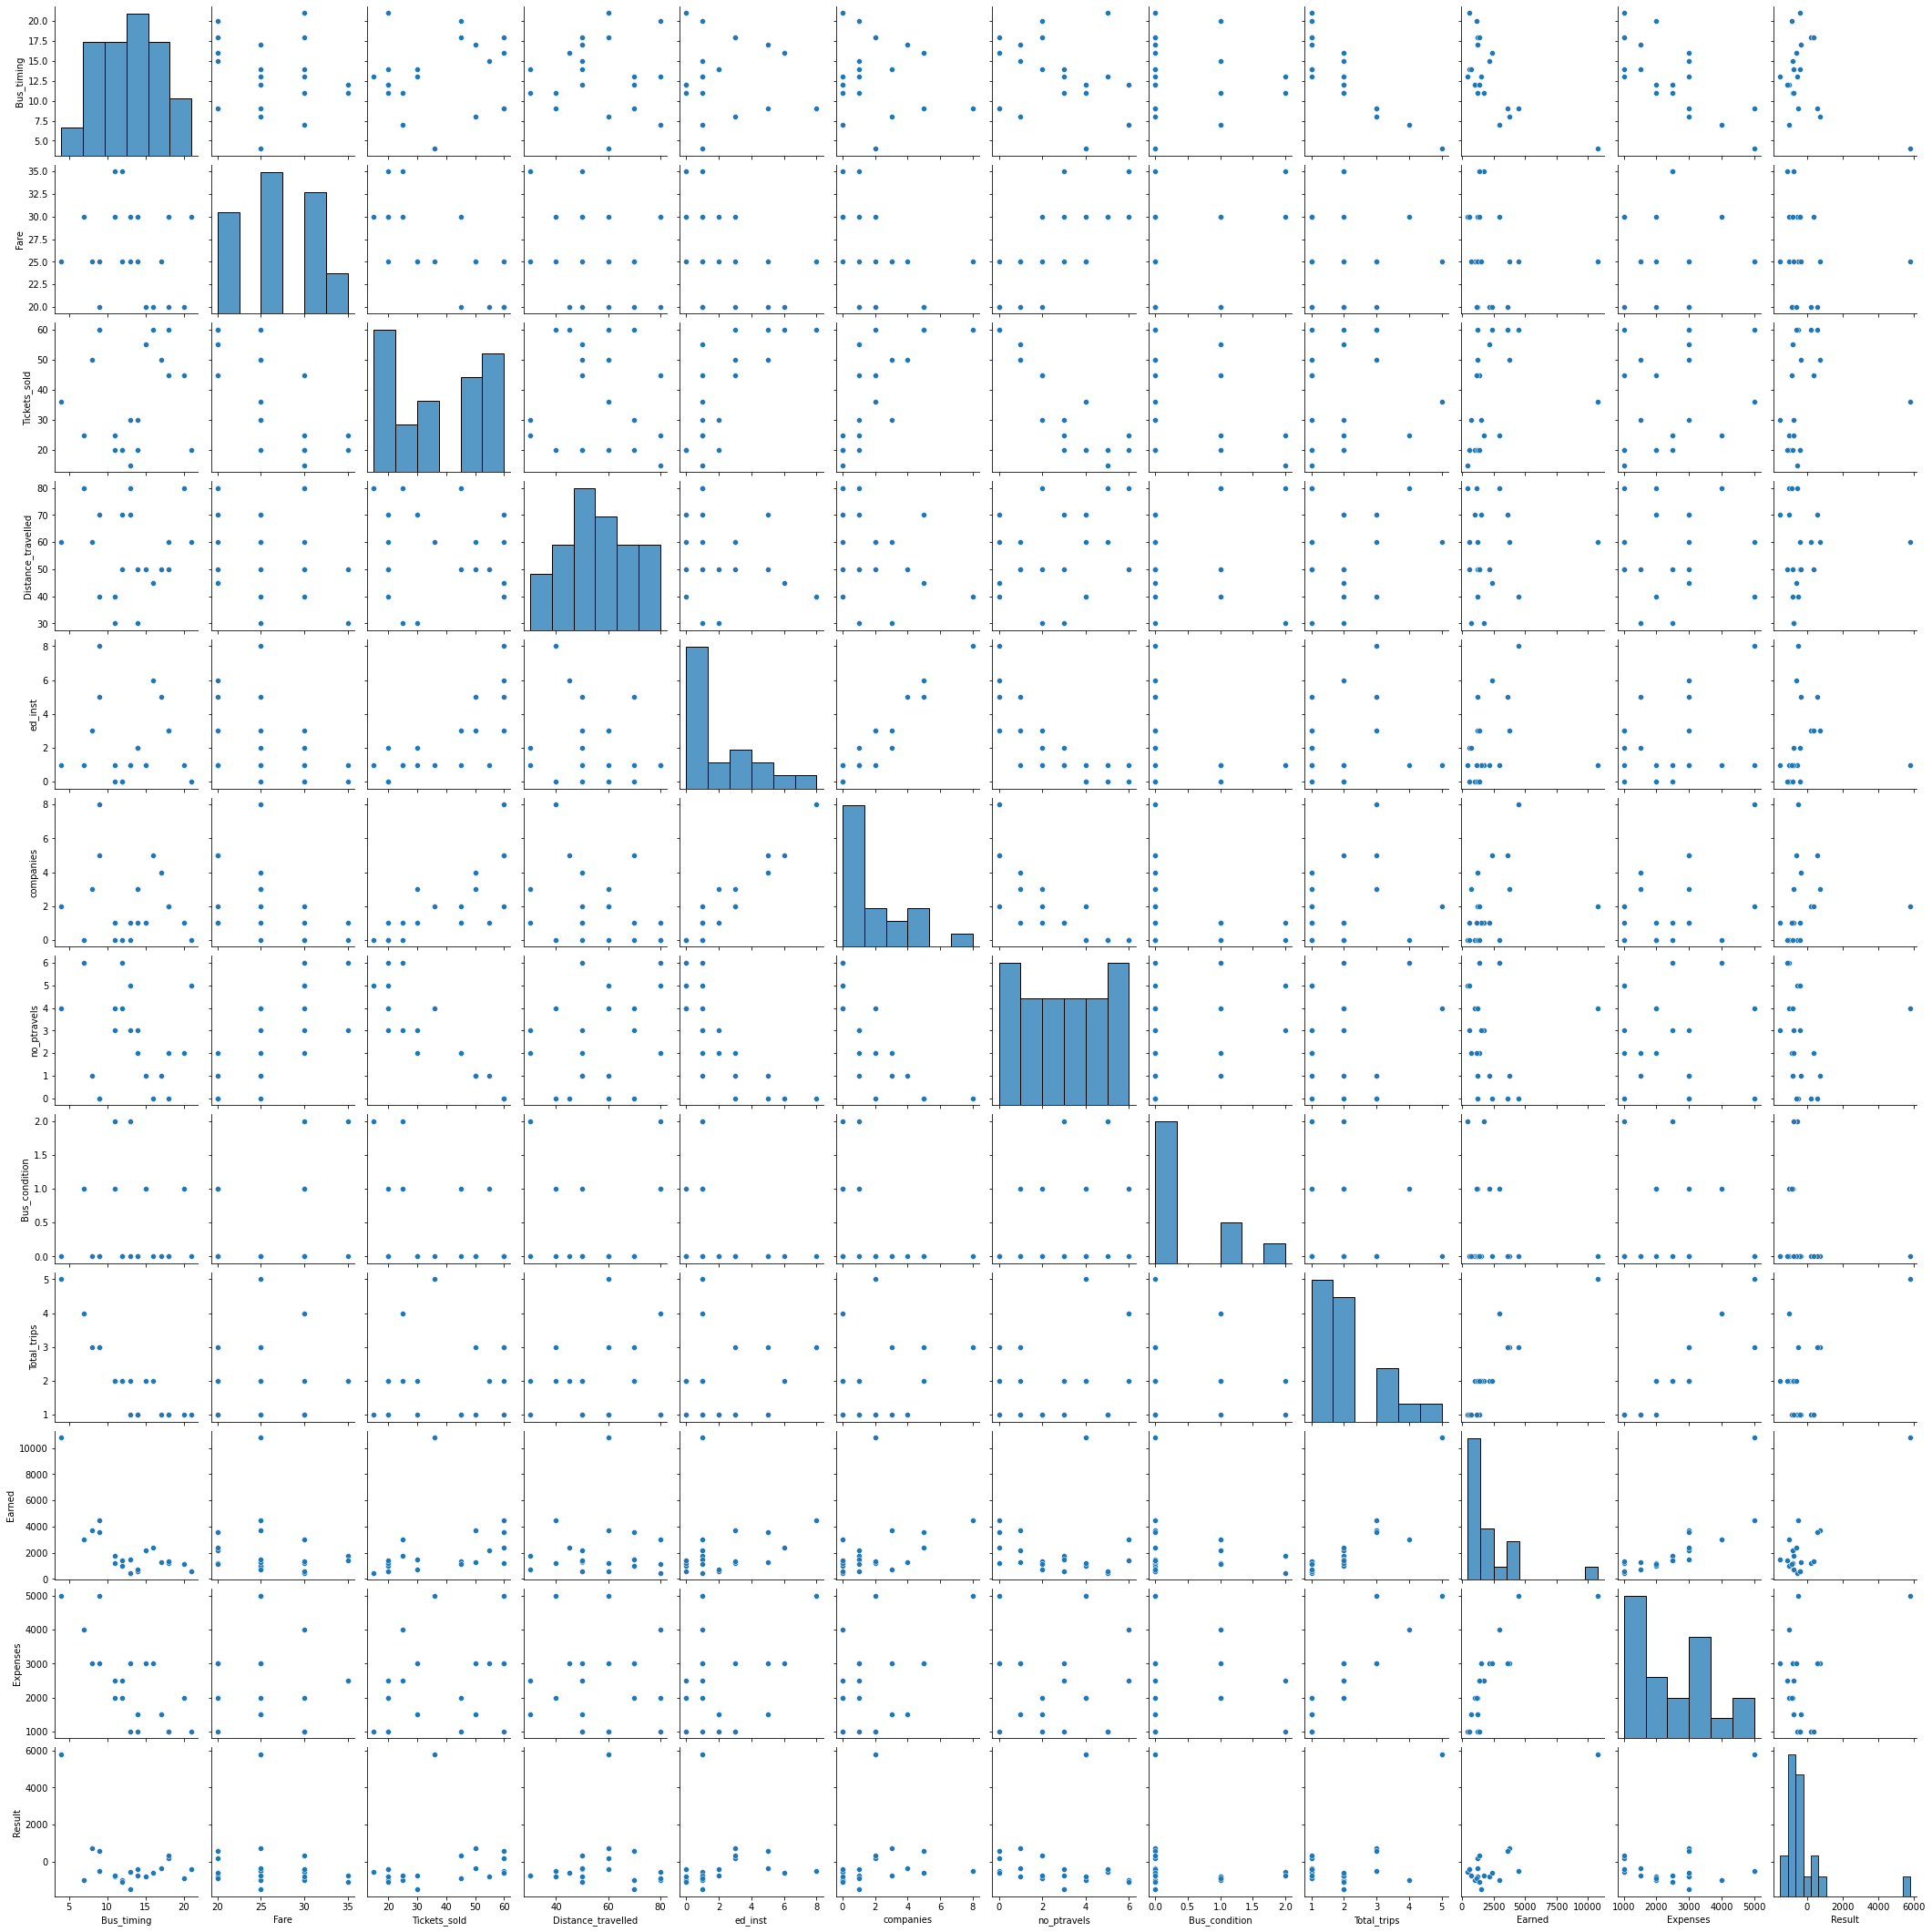

In [27]:
sns.pairplot(df)

<AxesSubplot:xlabel='Total_trips', ylabel='Earned'>

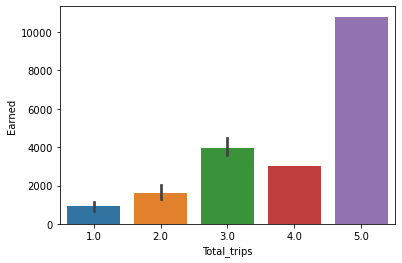

In [28]:
sns.barplot(x = df["Total_trips"], y = df["Earned"])

In [29]:
# increased trips increased earnings

<AxesSubplot:xlabel='Total_trips', ylabel='Expenses'>

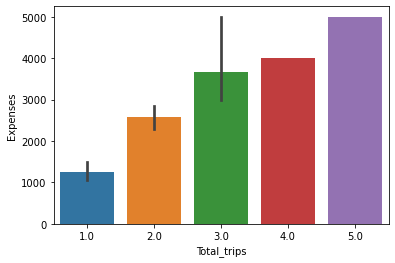

In [30]:
sns.barplot(x = df["Total_trips"], y = df["Expenses"])

In [31]:
# there is also direct realtionship between the toatl trips and expenses, because increased trips increases fuel expenses too

In [32]:
T_earned=sum(df['Earned'])

In [33]:
total_expenses=sum(df['Expenses'])

In [34]:
total_amount=T_earned-total_expenses
print(total_amount)

-3575.0


<AxesSubplot:xlabel='Tickets_sold', ylabel='Distance_travelled'>

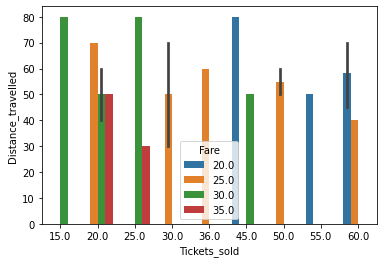

In [36]:
sns.barplot(x=df['Tickets_sold'], y=df['Distance_travelled'], hue=df['Fare'])

<AxesSubplot:xlabel='Tickets_sold', ylabel='Distance_travelled'>

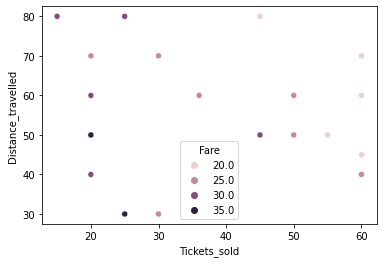

In [39]:
sns.scatterplot(x=df['Tickets_sold'],y=df['Distance_travelled'], hue=df['Fare'])

<AxesSubplot:xlabel='Distance_travelled', ylabel='Total_trips'>

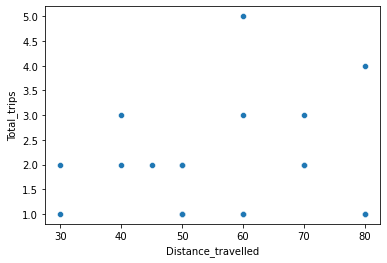

In [41]:
sns.scatterplot(x=df['Distance_travelled'],y=df['Total_trips'])

<AxesSubplot:xlabel='Earned', ylabel='Expenses'>

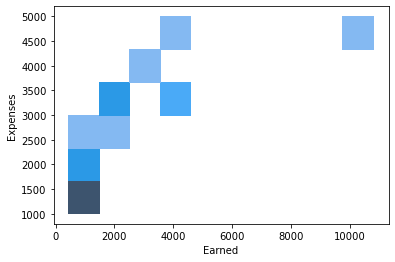

In [44]:
sns.histplot(x=df['Earned'],y=df['Expenses'])

<AxesSubplot:ylabel='Density'>

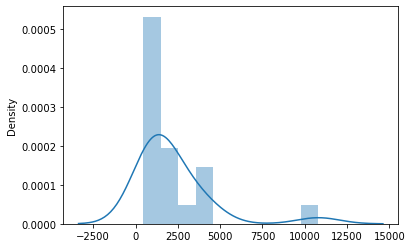

In [45]:
sns.distplot(x=df['Earned'])

# Building a Machine Learning Model

In [51]:
x=df[['Tickets_sold','Distance_travelled','Bus_condition','Total_trips','Earned','Expenses']]
y=df['Result']

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [56]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
reg.predict([[55,50,1,2,2200,3000]])

array([-814.09987352])

In [57]:
Tickets_sold=float(input())
Distance_travelled=float(input())
Bus_condition=float(input())
Total_trips=float(input())
Earned=float(input())
Expenses=float(input())

55
50
1
2
2200
3000


In [58]:
print(reg.predict([[Tickets_sold,Distance_travelled,Bus_condition,Total_trips,Earned,Expenses]]))

[-814.09987352]


In [62]:
def results(a,b):
    result=Earned-Expenses
    if(result>0):
        print(f"profit is: {result}")
    else:
        print(f"loss is: {result}")
        
        
Earned=int(input())
Expenses=int(input())

results(Earned,Expenses)

3000
4000
loss is: -1000


# Thus we are getting a loss 
> due to the increased private travels

> due to increased trips thereby increased expenses

> less ratio of no.of trips to tickets sold 

> increased passes and reduced money

> condition of buses

> improper management of trips


# we can overcome this problem by utilising the data efficiently and getting valuable insights from a real-time data and avoiding the above mentioned problems

* Thus TSRTC will be in Profits 